This script aggragates the metadata files that were generated during the web scraping process. Additionally some additional columns will be made
such as card print year, card price, and website source. To make these columns the description column will be searched.

In [1]:
import numpy as np
import pandas as pd
import pickle
from PIL import Image, UnidentifiedImageError
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os


In [2]:
def extract_year(desc):
    """
    Parses a description string and extracts a numerical year from it. 
    Matches a 4-digit number between 1850 and 2023. FYI the first ever baseball card was made in 1856
    Args:
        desc (str): description
    Returns:
        year (num): the year
    """
    pattern = r'(\b\d{4}\b)'
    matches = re.findall(pattern, desc)  # within a given description, find all instances of the conditions
    for match in matches:
        year = int(match)
        if year >= 1850 and year <= 2023:  # grab the first instance that makes chronological sense
            return year
    return float('nan')

In [ ]:
## USER INPUT ##

# the name of the final metadata file that will be made
metadata_filename = "metadata_3k_subset.pickle"

In [3]:
## LOAD THE METADATA ##

# combine all of the metadata files
df1 = pd.read_pickle('/Users/brianmiller/Desktop/collection_files/PSA1_collectors_metadata.pkl')
df2 = pd.read_pickle('/Users/brianmiller/Desktop/collection_files/PSA2_collectors_metadata.pkl')
df3 = pd.read_pickle('/Users/brianmiller/Desktop/collection_files/PSA3_collectors_metadata.pkl')
df4 = pd.read_pickle('/Users/brianmiller/Desktop/collection_files/PSA4_collectors_metadata.pkl')
df5 = pd.read_pickle('/Users/brianmiller/Desktop/collection_files/PSA5_collectors_metadata.pkl')
df6 = pd.read_pickle('/Users/brianmiller/Desktop/collection_files/PSA6_collectors_metadata.pkl')
df7 = pd.read_pickle('/Users/brianmiller/Desktop/collection_files/PSA7_collectors_metadata.pkl')
df8 = pd.read_pickle('/Users/brianmiller/Desktop/collection_files/PSA8_collectors_metadata.pkl')
df9 = pd.read_pickle('/Users/brianmiller/Desktop/collection_files/PSA9_collectors_metadata.pkl')
df10 = pd.read_pickle('/Users/brianmiller/Desktop/collection_files/PSA10_collectors_metadata.pkl')

# concatenate dataframes
metadata_df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10])


In [4]:
## PREPROCESSING STEPS ##

# get the grade int from the grade string
metadata_df['grade_num'] = metadata_df['grade'].str.extract(r'(\d{1,2})')  # captures 1 or 2 digits in a capturing group
metadata_df['grade_num'] = pd.to_numeric(metadata_df['grade_num'])

# get the price num from the price string
# captures the digits (with optional comma for thousand separators) and decimal point (with 2 decimal places) in a capturing group
metadata_df['price_num'] = metadata_df['price'].str.extract(r'\$([\d,]+(?:\.\d{2})?)')
metadata_df['price_num'] = pd.to_numeric(metadata_df['price_num'].str.replace(',', ''))

# get the year from the description string
metadata_df['year'] = metadata_df['desc'].apply(extract_year)

# shorten the file name to just the file, not the full path
# The ([^/]+) group captures the filename (and extension) at the end of the path
metadata_df["image_name_file"] = metadata_df["image_name"].str.extract(r"/([^/]+)$")

# clean up the source column
# matches any string of characters enclosed in parentheses, along with any whitespace before or after the parentheses
# It then applies this pattern to each string in the 'source' column using the re.sub() function, which removes all occurrence
metadata_df['source_clean'] = metadata_df['source'].apply(lambda x: re.sub(r'\s*\([^)]*\)', '', x))

print(metadata_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366239 entries, 1 to 104041
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               366239 non-null  int64  
 1   grade            366239 non-null  object 
 2   image_name       366239 non-null  object 
 3   price            357581 non-null  object 
 4   desc             366239 non-null  object 
 5   source           366239 non-null  object 
 6   grade_num        366239 non-null  int64  
 7   price_num        357581 non-null  float64
 8   year             362895 non-null  float64
 9   image_name_file  366239 non-null  object 
 10  source_clean     366239 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 33.5+ MB
None


In [5]:
## MAKE A TRUNCATED VERSION OF THE METADATA ##

# subset the metadata to just the files in a specific folder
folder_path = "/Users/brianmiller/Desktop/collection_files/images_3k"
file_names = os.listdir(folder_path)  # get file names
metadata_df_subset = metadata_df[metadata_df["image_name_file"].isin(file_names)]

# print(metadata_df_subset.info())
print(metadata_df_subset[["grade_num"]].value_counts())

# # save to pickle file
# metadata_df_subset.to_pickle(metadata_filename)



grade_num
10           3000
9            2999
1            2971
2            2938
8            2937
4            2928
3            2908
5            2906
6            2905
7            2876
dtype: int64


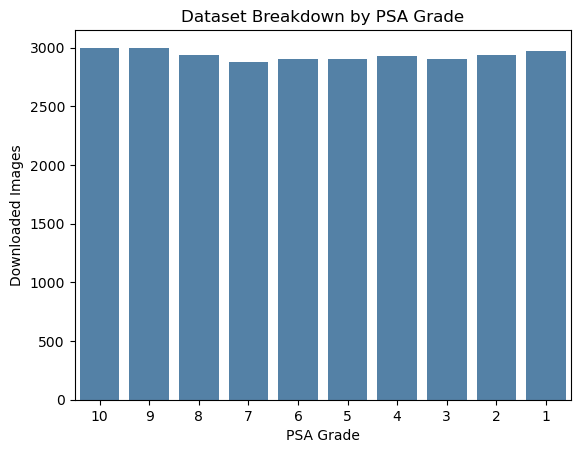

In [7]:
##  VISUALIZE DISTRIBUTION  ##

sns.countplot(x='grade_num', data=metadata_df,color='steelblue', order=sorted(metadata_df['grade_num'].unique(), reverse=True))

# Set the plot title and axis labels
plt.title('Dataset Breakdown by PSA Grade')
plt.xlabel('PSA Grade')
plt.ylabel('Downloaded Images')

# Display the plot
plt.show()


